In [2]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 20604



In [3]:
sas.submitLST(
f"""
data stocks;
    set sashelp.stocks;
    if volume = 5976252.0 then do;
        stock = '';
        date = .;
        open = .;
        high = .;
        low = .;
        close = .;
        volume = .;
        adjclose = .;
    end;
    if volume = 5556471.0 then do;
        date = .;
        open = .;
        high = .;
        low = .;
        close = .;
        volume = .;
        adjclose = .;
    end;
run;

proc print data=stocks (obs=5);
    where stock = 'IBM' or stock = '';
run;
""")

Obs,Stock,Date,Open,High,Low,Close,Volume,AdjClose
1,,.,.,.,.,.,.,.
2,IBM,.,.,.,.,.,.,.
3,IBM,03OCT05,$80.22,$84.60,$78.70,$81.88,"7,019,666",$80.86
4,IBM,01SEP05,$80.16,$82.11,$76.93,$80.22,"5,772,280",$79.22
5,IBM,01AUG05,$83.00,$84.20,$79.87,$80.62,"4,801,386",$79.62



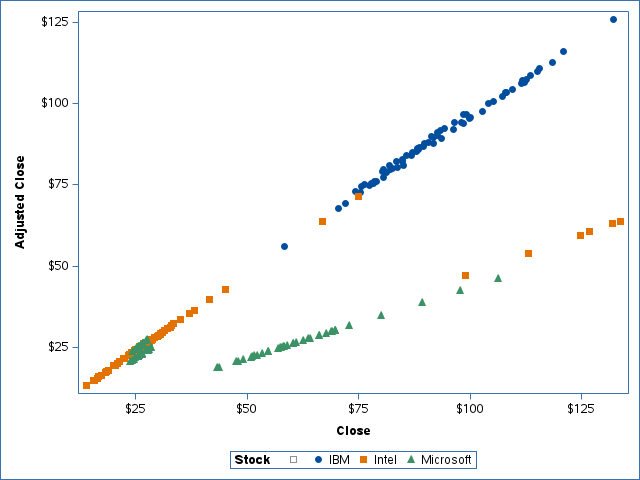

In [9]:
# scatter x y group
sas.submitLST(
f"""
proc sgplot data=stocks (where=(date > '01JAN2000'd or date = .));
    scatter x=close y=adjclose / group=stock ;
run;
""")


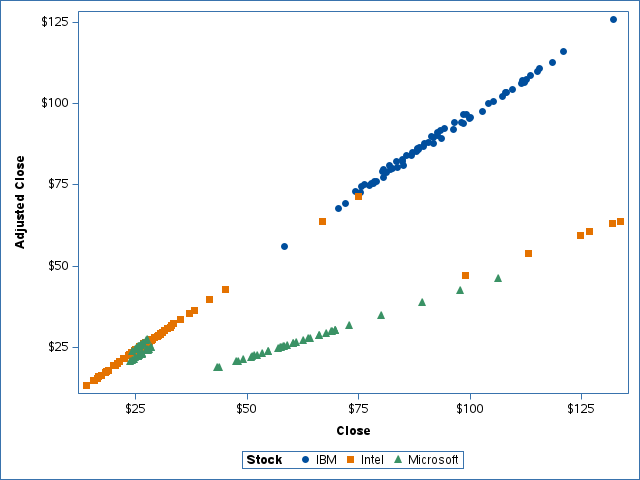

In [10]:
# nomissinggroup
sas.submitLST(
f"""
proc sgplot data=stocks (where=(date > '01JAN2000'd or date = .));
    scatter x=close y=adjclose / group=stock nomissinggroup;
run;
""")